In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform
import matplotlib.patches as patches

car = pd.read_csv('../data_chaeyeon/최종파일들/2021/21자동차현황(그래프용).csv')
hm_21 = pd.read_csv('../data_chaeyeon/최종파일들/2021/21화물차지원금.csv')

In [2]:
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')
    
pd.options.display.float_format = '{:.2f}'.format
    
car1_total = car['승용차'].sum()
car2_total = car['승합차'].sum()
car3_total = car['화물차'].sum()
# seoul = car[car['지역']=='서울']
# gg = car[car['지역']=='경기']
# incheon = car[car['지역']=='인천']
# dg = car[car['지역']=='대구']
# jj = car[car['지역']=='제주']

car1_a = (car['승용차']/car1_total)
car2_a = (car['승합차']/car2_total)
car3_a = (car['화물차']/car3_total)
car_final = pd.concat([car1_a,car2_a,car3_a], axis=1)
do = pd.DataFrame({
    '지역' : ['서울', '경기', '인천', '대구', '제주']
})
car_final = pd.concat([do, car_final], axis=1)
car_final

,지역,승용차,승합차,화물차
0,서울,0.25,0.26,0.21
1,경기,0.47,0.50,0.52
2,인천,0.13,0.12,0.12
3,대구,0.10,0.07,0.10
4,제주,0.05,0.05,0.05


<IPython.core.display.Javascript object>


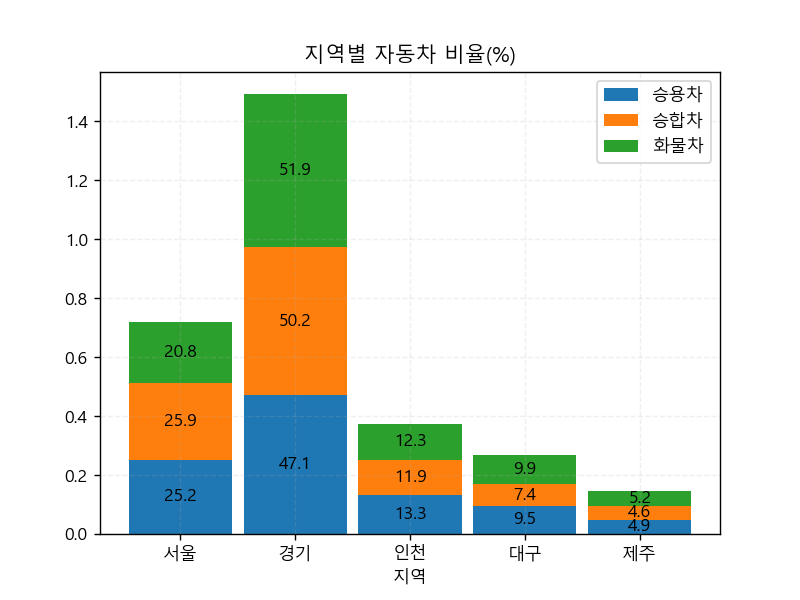

In [3]:
ax = car_final.plot(x='지역', kind='bar', stacked=True, title='지역별 자동차 비율(%)', width=0.9)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.xticks(rotation=0)
plt.grid(True, alpha=0.2, linestyle='--')
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>


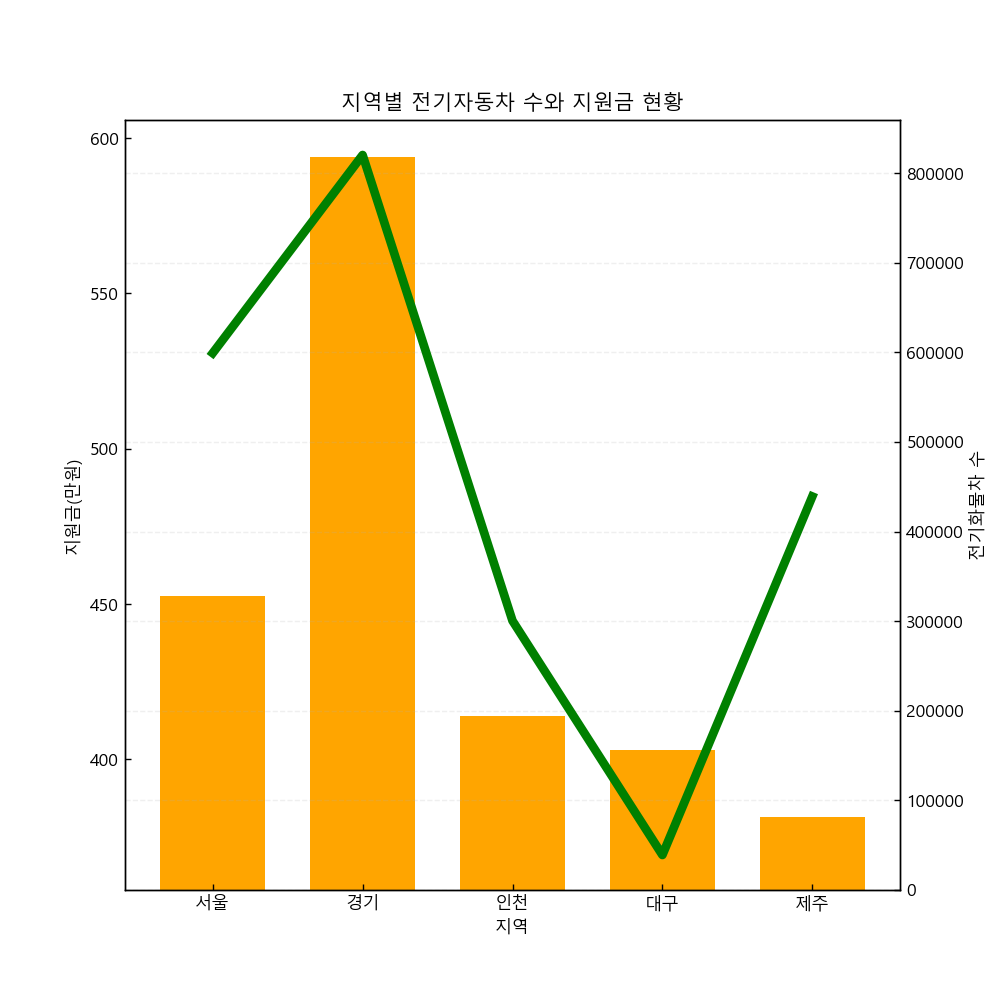

In [45]:
import matplotlib.pyplot as plt
import numpy as np

car_hm = car.iloc[:,[0,3]]
xlabel = ['서울', '경기', '인천', '대구', '제주']
ylabel1 = hm_21['지원금']
ylabel2 = car_hm['화물차']

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot()

ax1.plot(xlabel, ylabel1, color='green', markersize=7, linewidth=5)
#ax1.set_ylim(0, 18)
ax1.set_xlabel('지역')
ax1.set_ylabel('지원금(만원)')
ax1.tick_params(axis='both', direction='in')
ax2 = ax1.twinx()

ax2.bar(xlabel, ylabel2, color='orange',width=0.7)
#ax2.set_ylim(0, 850000)
ax2.set_ylabel('전기화물차 수')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.title('지역별 전기자동차 수와 지원금 현황')
plt.grid(True, alpha=0.2, linestyle='--')
plt.show()